## **Perceptron vs MLP**

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


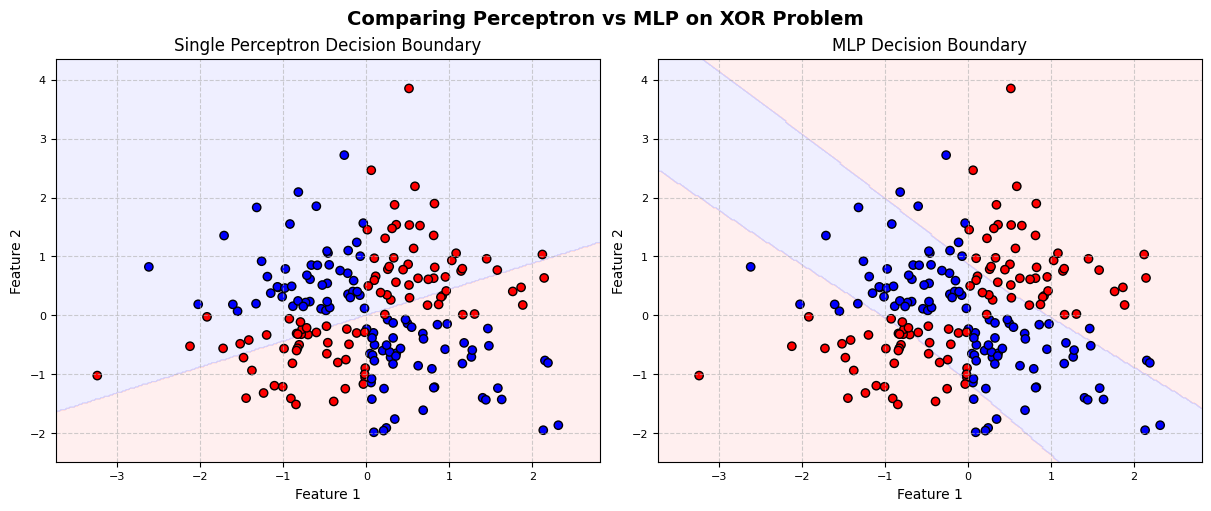

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

# Helper function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    # Create a mesh grid based on data limits
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # Predict on each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Define color maps for background and points
    cmap_background = ListedColormap(['#FFCCCC', '#CCCCFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    
    # Plot the decision boundary and data points
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolors='k')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Feature 1', fontsize=10)
    ax.set_ylabel('Feature 2', fontsize=10)
    ax.tick_params(labelsize=8)
    ax.grid(True, linestyle='--', alpha=0.6)

# Generate XOR dataset
np.random.seed(42)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

# Train a single-layer Perceptron (which is a linear classifier)
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X, y)

# Train an MLP (with one hidden layer) to capture the non-linear boundary
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
mlp.fit(X, y)

# Plotting the decision boundaries for both models on separate subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

plot_decision_boundary(perceptron, X, y, axs[0], 'Single Perceptron Decision Boundary')
plot_decision_boundary(mlp, X, y, axs[1], 'MLP Decision Boundary')

fig.suptitle('Comparing Perceptron vs MLP on XOR Problem', fontsize=14, fontweight='bold')
plt.show()

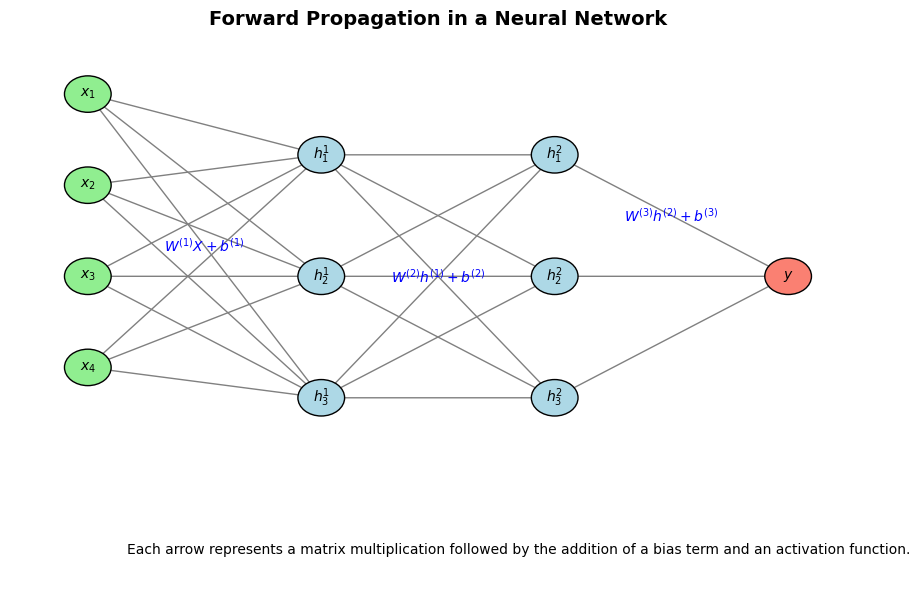

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle, Rectangle

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 8)
ax.axis('off')

# Define positions for nodes in each layer
# Input layer (4 nodes)
input_nodes = [(0, 7-i*1.5) for i in range(4)]
# Hidden Layer 1 (3 nodes)
hidden1_nodes = [(3, 6-i*2) for i in range(3)]
# Hidden Layer 2 (3 nodes)
hidden2_nodes = [(6, 6-i*2) for i in range(3)]
# Output Layer (1 node)
output_node = (9, 4)

# Draw nodes for each layer
def draw_node(pos, label, color='lightblue'):
    circle = Circle(pos, 0.3, facecolor=color, edgecolor='black', zorder=3)
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], label, fontsize=10, ha='center', va='center', zorder=4)

# Draw input nodes with labels
for idx, pos in enumerate(input_nodes):
    draw_node(pos, f'$x_{idx+1}$', color='lightgreen')

# Draw hidden layer 1 nodes
for idx, pos in enumerate(hidden1_nodes):
    draw_node(pos, f'$h^1_{idx+1}$')

# Draw hidden layer 2 nodes
for idx, pos in enumerate(hidden2_nodes):
    draw_node(pos, f'$h^2_{idx+1}$')

# Draw output node
draw_node(output_node, '$y$', color='salmon')

# Draw arrows between nodes of consecutive layers
def draw_arrows(layer_from, layer_to, weight_label=""):
    for pos_from in layer_from:
        for pos_to in layer_to:
            arrow = FancyArrowPatch(pos_from, pos_to, arrowstyle='->', mutation_scale=10, 
                                    color='gray', lw=1)
            ax.add_patch(arrow)
    if weight_label:
        # Place label in the middle of the arrow block
        x_mid = (layer_from[0][0] + layer_to[0][0]) / 2
        y_mid = (layer_from[0][1] + layer_to[-1][1]) / 2
        ax.text(x_mid, y_mid, weight_label, fontsize=10, color='blue', ha='center', va='center')

# Draw arrows from Input -> Hidden Layer 1 with weight matrix W1 and bias b1
draw_arrows(input_nodes, hidden1_nodes, weight_label=r'$W^{(1)}X + b^{(1)}$')

# Draw arrows from Hidden Layer 1 -> Hidden Layer 2 with weight matrix W2 and bias b2
draw_arrows(hidden1_nodes, hidden2_nodes, weight_label=r'$W^{(2)}h^{(1)} + b^{(2)}$')

# Draw arrows from Hidden Layer 2 -> Output with weight matrix W3 and bias b3
draw_arrows(hidden2_nodes, [output_node], weight_label=r'$W^{(3)}h^{(2)} + b^{(3)}$')

# Add title and a text description
ax.set_title("Forward Propagation in a Neural Network", fontsize=14, fontweight='bold')
ax.text(0.5, -0.5, "Each arrow represents a matrix multiplication followed by the addition of a bias term and an activation function.",
        fontsize=10, ha='left', va='center', transform=ax.transData)

plt.tight_layout()
plt.show()

<>:82: SyntaxWarning: invalid escape sequence '\c'
<>:82: SyntaxWarning: invalid escape sequence '\c'
C:\Users\adhab\AppData\Local\Temp\ipykernel_10044\1638366505.py:82: SyntaxWarning: invalid escape sequence '\c'
  "activation = $W^{(l)} \cdot \\text{input} + b^{(l)}$,\n"


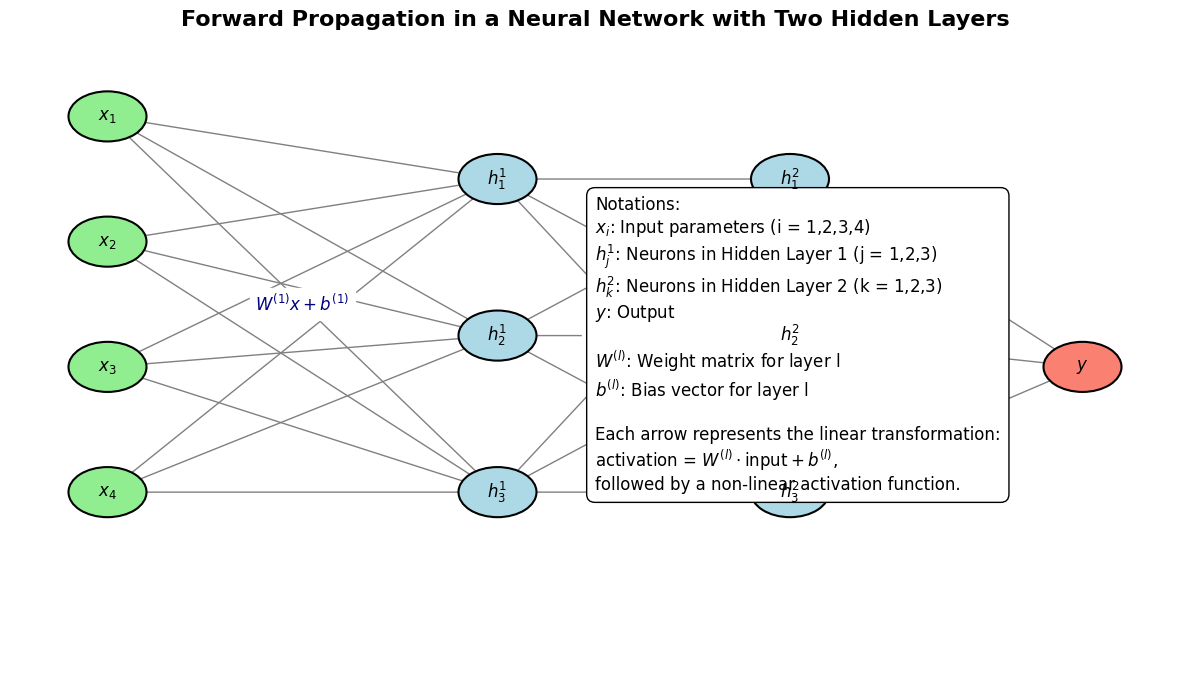

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle

# ---------------------------
# Diagram Settings and Layout
# ---------------------------
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 9)
ax.axis('off')

# ---------------------------
# Define Node Positions for Layers
# ---------------------------
# Input Layer: 4 nodes, labeled x1, x2, x3, x4
input_nodes = [(0, 8 - i*2) for i in range(4)]
# Hidden Layer 1: 3 neurons, labeled h¹₁, h¹₂, h¹₃
hidden1_nodes = [(4, 7 - i*2.5) for i in range(3)]
# Hidden Layer 2: 3 neurons, labeled h²₁, h²₂, h²₃
hidden2_nodes = [(7, 7 - i*2.5) for i in range(3)]
# Output Layer: 1 node, labeled y
output_node = (10, 4)

# ---------------------------
# Helper Functions for Drawing
# ---------------------------
def draw_node(pos, label, color='lightblue'):
    """Draw a node (circle) at a given position with a label."""
    circle = Circle(pos, 0.4, facecolor=color, edgecolor='black', lw=1.5, zorder=3)
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], label, fontsize=12, ha='center', va='center', zorder=4)

def draw_arrows(layer_from, layer_to, label):
    """Draw arrows from each node in layer_from to each node in layer_to and annotate the connection."""
    for start in layer_from:
        for end in layer_to:
            arrow = FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=12, 
                                    color='gray', lw=1)
            ax.add_patch(arrow)
    # Place a label for the entire connection block
    x_mid = (layer_from[0][0] + layer_to[0][0]) / 2
    y_mid = (layer_from[0][1] + layer_to[-1][1]) / 2
    ax.text(x_mid, y_mid, label, fontsize=12, color='navy', ha='center', va='center', backgroundcolor='white')

# ---------------------------
# Draw Nodes for Each Layer
# ---------------------------
# Input Layer nodes: using a light green color for inputs
for idx, pos in enumerate(input_nodes):
    draw_node(pos, f'$x_{{{idx+1}}}$', color='lightgreen')

# Hidden Layer 1 nodes: labeled with superscript 1 for first hidden layer
for idx, pos in enumerate(hidden1_nodes):
    draw_node(pos, f'$h^1_{{{idx+1}}}$')

# Hidden Layer 2 nodes: labeled with superscript 2 for second hidden layer
for idx, pos in enumerate(hidden2_nodes):
    draw_node(pos, f'$h^2_{{{idx+1}}}$')

# Output Layer node: using a salmon color for output
draw_node(output_node, '$y$', color='salmon')

# ---------------------------
# Draw Connections with Matrix Multiplication & Biases
# ---------------------------
draw_arrows(input_nodes, hidden1_nodes, r'$W^{(1)}x + b^{(1)}$')
draw_arrows(hidden1_nodes, hidden2_nodes, r'$W^{(2)}h^{(1)} + b^{(2)}$')
draw_arrows(hidden2_nodes, [output_node], r'$W^{(3)}h^{(2)} + b^{(3)}$')

# ---------------------------
# Notations Used (Legend)
# ---------------------------
legend_text = (
    "Notations:\n"
    "$x_i$: Input parameters (i = 1,2,3,4)\n"
    "$h^1_j$: Neurons in Hidden Layer 1 (j = 1,2,3)\n"
    "$h^2_k$: Neurons in Hidden Layer 2 (k = 1,2,3)\n"
    "$y$: Output\n\n"
    "$W^{(l)}$: Weight matrix for layer l\n"
    "$b^{(l)}$: Bias vector for layer l\n\n"
    "Each arrow represents the linear transformation:\n"
    "activation = $W^{(l)} \cdot \\text{input} + b^{(l)}$,\n"
    "followed by a non-linear activation function."
)
ax.text(0.5, 0.5, legend_text, fontsize=12, ha='left', va='center',
        transform=fig.transFigure, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# ---------------------------
# Title and Final Adjustments
# ---------------------------
ax.set_title("Forward Propagation in a Neural Network with Two Hidden Layers", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

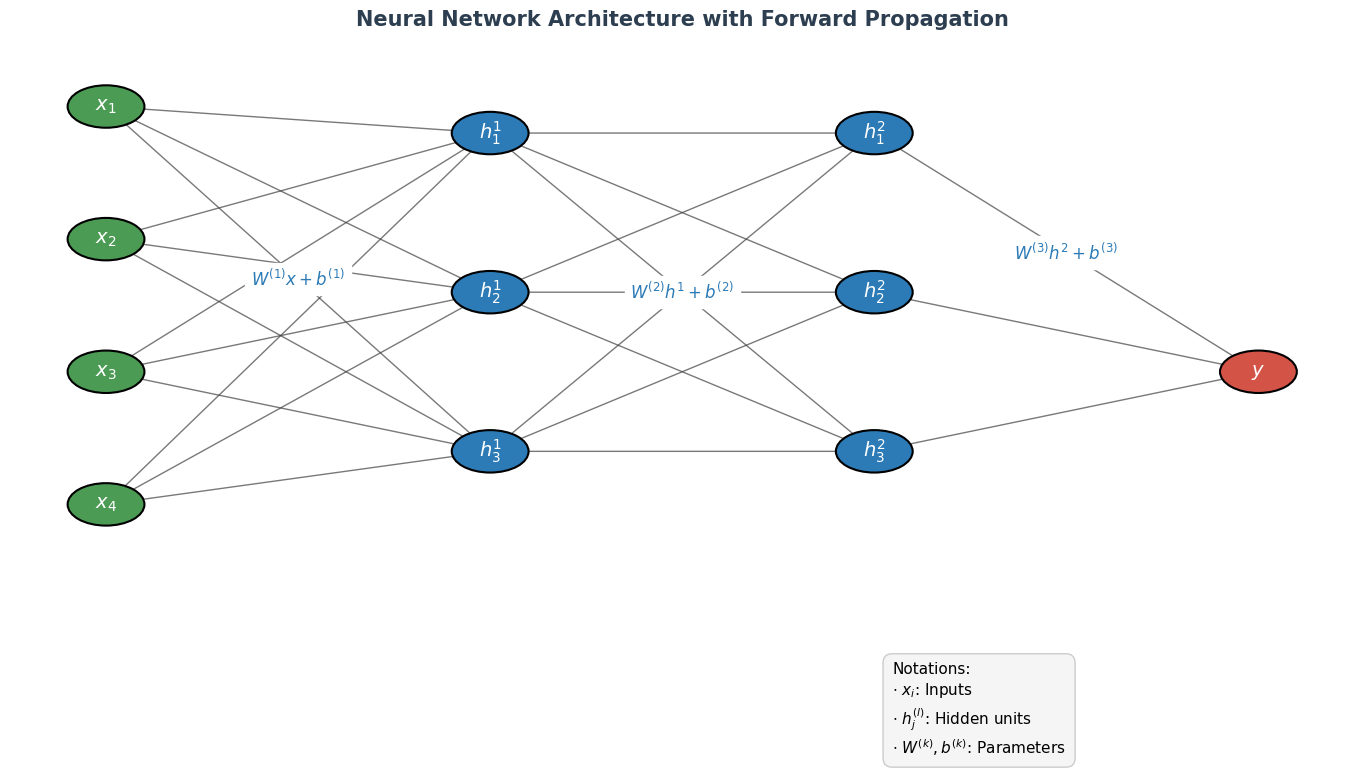

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle

# ---------------------------
# Diagram Settings and Layout
# ---------------------------
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(-1, 13)
ax.set_ylim(-1, 11)
ax.axis('off')

# ---------------------------
# Define Node Positions
# ---------------------------
input_nodes = [(0, 10 - i*2.5) for i in range(4)]
hidden1_nodes = [(4, 9.5 - i*3) for i in range(3)]
hidden2_nodes = [(8, 9.5 - i*3) for i in range(3)]
output_node = (12, 5)

# ---------------------------
# Drawing Functions
# ---------------------------
def draw_node(pos, label, color='#2C7BB6'):
    circle = Circle(pos, 0.4, facecolor=color, edgecolor='black', lw=1.5, zorder=3)
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], label, fontsize=14, ha='center', va='center', 
            zorder=4, color='white', fontweight='bold')

def draw_arrows(layer_from, layer_to, label):
    x_mid = (layer_from[0][0] + layer_to[0][0])/2
    y_mid = (layer_from[0][1] + layer_to[-1][1])/2
    for start in layer_from:
        for end in layer_to:
            arrow = FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=15, 
                                    color='#404040', lw=1, alpha=0.7, zorder=1)
            ax.add_patch(arrow)
    ax.text(x_mid, y_mid, label, fontsize=12, color='#2C7BB6', ha='center', va='center',
            backgroundcolor='white')

# ---------------------------
# Draw Components
# ---------------------------
for idx, pos in enumerate(input_nodes):
    draw_node(pos, f'$x_{{{idx+1}}}$', '#4C9B54')

for idx, pos in enumerate(hidden1_nodes):
    draw_node(pos, f'$h^{{1}}_{{{idx+1}}}$')

for idx, pos in enumerate(hidden2_nodes):
    draw_node(pos, f'$h^{{2}}_{{{idx+1}}}$')

draw_node(output_node, '$y$', '#D45347')

# ---------------------------
# Draw Connections
# ---------------------------
draw_arrows(input_nodes, hidden1_nodes, r'$W^{(1)}x + b^{(1)}$')
draw_arrows(hidden1_nodes, hidden2_nodes, r'$W^{(2)}h^1 + b^{(2)}$')
draw_arrows(hidden2_nodes, [output_node], r'$W^{(3)}h^2 + b^{(3)}$')

# ---------------------------
# Compact Legend
# ---------------------------
legend_text = (
    "Notations:\n"
    r"$\cdot$ $x_i$: Inputs" "\n"
    r"$\cdot$ $h^{(l)}_j$: Hidden units" "\n"
    r"$\cdot$ $W^{(k)}, b^{(k)}$: Parameters"
)
ax.text(0.65, 0.15, legend_text, fontsize=11, ha='left', va='top',
        transform=fig.transFigure, linespacing=1.3,
        bbox=dict(facecolor='#F5F5F5', edgecolor='#CCCCCC', boxstyle='round,pad=0.6'))

# ---------------------------
# Title
# ---------------------------
ax.set_title("Neural Network Architecture with Forward Propagation", 
            fontsize=15, fontweight='bold', pad=20, color='#2C3E50')

plt.tight_layout(pad=2)
plt.show()